<a href="https://colab.research.google.com/github/KyriakiGeorgiou/KyriakiGeorgiou/blob/main/dogs_vs_cats_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100 #number of training examples to process before updating our models variables
IMG_SHAPE = 150 #our training data consists of images with width and height of 150 pixels

In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1./255) #Generator for our training data
validation_image_generator = ImageDataGenerator (rescale = 1./255) #Generator for our

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                            directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE), #150,150
                                                           class_mode = "binary") 


Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                              directory = validation_dir,
                                                              target_size = (IMG_SHAPE, IMG_SHAPE),
                                                              class_mode = "binary")

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in 
def plotImages(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

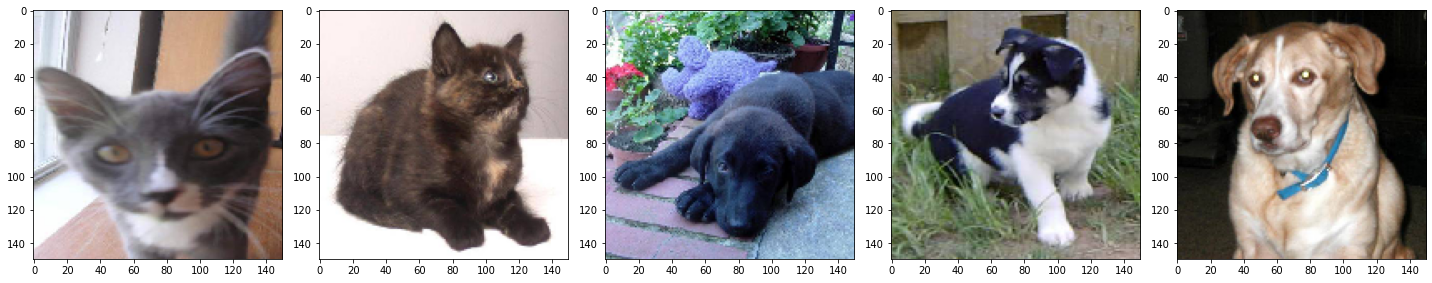

In [ ]:
plotImages(sample_training_images[:5]) #Plot images 0-4

In [ ]:
#Model Definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(2)
])

In [ ]:
#Compile model

model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#Train the model

EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100
20/20 [==============================] - 21s 428ms/step - loss: 0.7371 - accuracy: 0.4855 - val_loss: 0.6925 - val_accuracy: 0.5440
Epoch 2/100
20/20 [==============================] - 8s 423ms/step - loss: 0.6904 - accuracy: 0.5280 - val_loss: 0.6778 - val_accuracy: 0.5120
Epoch 3/100
20/20 [==============================] - 9s 472ms/step - loss: 0.6832 - accuracy: 0.5435 - val_loss: 0.6641 - val_accuracy: 0.5980
Epoch 4/100
20/20 [==============================] - 9s 429ms/step - loss: 0.6517 - accuracy: 0.6000 - val_loss: 0.6535 - val_accuracy: 0.6090
Epoch 5/100
20/20 [==============================] - 9s 432ms/step - loss: 0.6244 - accuracy: 0.6320 - val_loss: 0.6174 - val_accuracy: 0.6400
Epoch 6/100
20/20 [==============================] - 8s 421ms/step - loss: 0.5861 - accuracy: 0.6900 - val_loss: 0.5963 - val_accuracy: 0.6770
Epoch 7/100
20/20 [==============================] - 8s 417ms/step - loss: 0.5663 - accuracy: 0.7030 - val_loss: 0.5735 - val_accuracy: 0.697

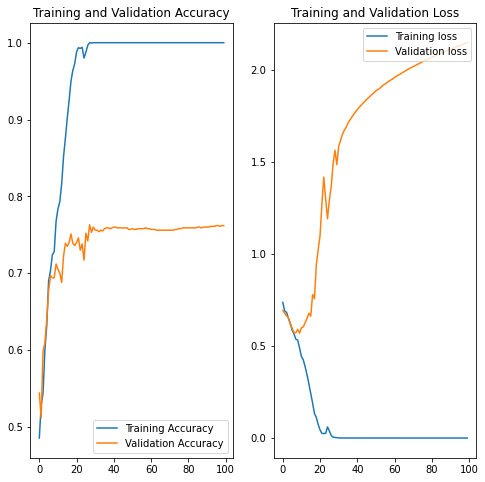

In [ ]:
#Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training loss')
plt.plot(epochs_range, val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show() 

# As we can see from the plots, training accuracy and validation accuracy are off
# by large margin and our model has achieved only around 70% accuracy on the validation set
# This is a clear indication of overfitting.